# **California Housing Price**

[Sumber data California Housing Price](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

### **Context**
Pasar properti di California memiliki dinamika yang kompleks dengan harga rumah yang sangat bervariasi tergantung pada berbagai faktor seperti lokasi geografis, karakteristik rumah, serta kondisi ekonomi. Seiring dengan meningkatnya permintaan perumahan dan keterbatasan lahan, banyak pihak yang membutuhkan **prediksi harga rumah yang akurat** untuk pengambilan keputusan yang lebih baik.

Dalam industri properti, harga rumah tidak hanya ditentukan oleh ukuran dan jumlah kamar, tetapi juga oleh **faktor eksternal** seperti kedekatan dengan pusat ekonomi, populasi daerah, dan bahkan kedekatan dengan laut (*ocean proximity*). Oleh karena itu, penting untuk mengembangkan model **Machine Learning (ML)** yang dapat membantu dalam **memprediksi harga rumah dengan akurat** berdasarkan berbagai fitur yang tersedia.


### **Problem Statement**
Salah satu tantangan terbesar dalam industri properti adalah bagaimana **menentukan harga rumah yang wajar dan kompetitif** di tengah fluktuasi pasar. **Pembeli, agen properti, dan pengembang real estate** sering menghadapi kesulitan dalam menentukan apakah harga suatu rumah sudah sesuai dengan pasar atau tidak.

Mengingat bahwa **harga rumah dipengaruhi oleh banyak faktor**, diperlukan suatu pendekatan berbasis data yang dapat membantu memprediksi harga properti dengan lebih akurat. Dengan semakin meningkatnya jumlah transaksi properti dan data yang tersedia, penggunaan **Machine Learning** dalam prediksi harga rumah dapat menjadi solusi yang efektif. 

Sehingga, tantangan utama yang ingin dipecahkan adalah:  
**Bagaimana membangun model Machine Learning yang mampu memprediksi harga rumah di California secara akurat berdasarkan fitur-fitur properti yang tersedia?**

### **Goals**
Berdasarkan permasalahan di atas, model Machine Learning ini bertujuan untuk:
1. **Membantu stakeholder** (agen properti, pengembang, calon pembeli) dalam **menentukan harga rumah yang wajar** berdasarkan faktor-faktor yang relevan.
2. **Menyediakan alat bantu prediksi harga properti** yang dapat digunakan dalam proses negosiasi atau strategi penjualan.
3. **Mengidentifikasi faktor utama yang paling berpengaruh terhadap harga rumah**, seperti lokasi, jumlah kamar, atau pendapatan median suatu daerah.
4. **Meningkatkan efisiensi pengambilan keputusan** di industri properti dengan memberikan estimasi harga berbasis data.

Dengan adanya model prediksi ini, pihak-pihak yang berkepentingan dapat mengoptimalkan strategi mereka dalam jual-beli rumah serta memahami pola pasar dengan lebih baik.

### **Analytic Approach**
Pendekatan analitik yang akan digunakan dalam proyek ini meliputi:
1. **Eksplorasi Data**  
   - Menganalisis distribusi harga rumah serta hubungan antara fitur-fitur yang ada.  
   - Mengidentifikasi korelasi antara variabel seperti **median_income, jumlah kamar, dan lokasi geografis** terhadap harga rumah.  
2. **Preprocessing Data**  
   - Menangani **data yang hilang**, melakukan **encoding untuk fitur kategorikal**, serta **normalisasi fitur numerik** agar sesuai untuk pemodelan.
3. **Pemodelan Machine Learning**  
   - Menggunakan algoritma regresi seperti **Linear Regression dan Random Forest Regressor** untuk memprediksi harga rumah.
4. **Evaluasi Model**  
   - Mengukur performa model menggunakan metrik seperti **MAE, MSE, RMSE, dan R-squared**.

### **Metric Evaluation**
Evaluasi model akan menggunakan beberapa metrik standar dalam regresi:
- **MAE (Mean Absolute Error)** → Rata-rata kesalahan absolut dari prediksi terhadap nilai sebenarnya.
- **MSE (Mean Squared Error)** → Rata-rata kuadrat dari kesalahan prediksi, lebih sensitif terhadap outlier.
- **RMSE (Root Mean Squared Error)** → Akar dari MSE, memberikan gambaran seberapa besar kesalahan prediksi dalam satuan harga rumah.
- **R-squared (R²)** → Mengukur seberapa baik model dapat menjelaskan variasi dalam data, semakin mendekati 1 semakin baik.

Model dengan **nilai MAE, MSE, dan RMSE yang lebih kecil** serta **nilai R² yang lebih tinggi** akan dianggap sebagai model dengan performa terbaik.

## **Data Understanding**  

- Dataset ini merupakan data perumahan di **California** berdasarkan sensus tahun 1990.  
- Setiap baris data merepresentasikan informasi terkait properti di distrik tertentu di California.  

### **Attributes Information**  

| **Attribute**          | **Data Type** | **Description** |
|------------------------|--------------|----------------|
| `longitude`           | Float        | Longitude koordinat geografis |
| `latitude`            | Float        | Latitude koordinat geografis |
| `housing_median_age`  | Float        | Umur median rumah di distrik tersebut |
| `total_rooms`         | Integer      | Total jumlah kamar di distrik |
| `total_bedrooms`      | Integer      | Total jumlah kamar tidur di distrik |
| `population`         | Integer      | Total populasi di distrik |
| `households`         | Integer      | Jumlah rumah tangga di distrik |
| `median_income`      | Float        | Pendapatan median rumah tangga di distrik (dalam puluhan ribu dolar AS) |
| `ocean_proximity`    | Object       | Kedekatan distrik dengan laut (kategori) |
| `median_house_value` | Float        | Harga median rumah (Target variabel yang akan diprediksi) |



### **Import Library**

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split 

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

#hyperparameter tunning 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

### **Load DataSet**

In [2]:
df = pd.read_csv("data_california_house.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


### **Missing Values**

In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

terdapat **missing values** pada kolom **`total_bedrooms`** dengan **137 nilai yang hilang**. 

yang nantinya, akan diisi pada saat langkah data preprocessing

### **Data Duplicate**

In [4]:
df.duplicated().sum()

np.int64(0)

tidak terdapat data duplicated

### **Ukuran Data**

In [5]:
df.shape

(14448, 10)

terdapat 14.448 baris data dan 10 kolom data

### **Data Info**

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Berdasarkan output `df.describe()`, berikut beberapa **insight utama** yang dapat diambil dari data *California Housing Prices*:  

#### **1. Missing Values pada `total_bedrooms`**
- Jumlah total sampel (`count`) di sebagian besar kolom adalah **14,448**, tetapi untuk **`total_bedrooms` hanya 14,311**.
- Ini berarti ada **137 nilai yang hilang** dalam kolom **`total_bedrooms`**.
- Bisa diatasi dengan **imputasi median atau mean**, atau dengan menghapus baris yang memiliki missing values jika jumlahnya kecil.

---

#### **2. Distribusi Harga Rumah (`median_house_value`)**
- **Rata-rata (mean):** $206,824$
- **Median (50%):** $180,000$  
- **Maksimum:** $500,001$  
- **Minimum:** $14,999$  
- **Standar deviasi:** $115,365$  
🔹 **Insight:** Harga rumah sangat bervariasi, dengan distribusi yang kemungkinan skewed ke kanan (**right-skewed**), karena ada nilai **maksimum yang tinggi ($500,001$)**.

---

#### **3. Pendapatan Median (`median_income`)**
- **Mean:** $3.87$  
- **Median:** $3.53$  
- **Minimum:** $0.49$  
- **Maksimum:** $15.00$  
🔹 **Insight:** Pendapatan bervariasi, dan ada kemungkinan bahwa **pendapatan lebih tinggi berhubungan dengan harga rumah yang lebih mahal**.

---

#### **4. Karakteristik Properti**
| Fitur                  | Mean | Min | Max | Insight |
|----------------|---------|------|------|---------|
| `housing_median_age` | 28.6 | 1 | 52 | Mayoritas rumah memiliki usia sekitar 28 tahun, ada yang sangat baru (1 tahun) dan tua (52 tahun). |
| `total_rooms` | 2640 | 2 | 32,627 | Beberapa rumah memiliki jumlah kamar yang sangat besar. |
| `total_bedrooms` | 538 | 1 | 6,445 | Beberapa rumah memiliki jumlah kamar tidur sangat banyak, mungkin kompleks apartemen. |
| `population` | 1425 | 3 | 35,682 | Ada distrik dengan populasi sangat tinggi, bisa jadi area perkotaan padat. |
| `households` | 499 | 1 | 6,082 | Beberapa distrik hanya memiliki satu rumah tangga, mungkin area terpencil. |

---

#### **5. Longitude & Latitude (Lokasi Geografis)**
- **Longitude berkisar antara -124.35 hingga -114.31** (barat ke timur California).
- **Latitude berkisar antara 32.54 hingga 41.95** (selatan ke utara California).

🔹 **Insight:**  
- Dataset mencakup berbagai lokasi di California, dari daerah pesisir hingga pedalaman.  
- Kedekatan dengan laut (*ocean proximity*) bisa menjadi faktor penting dalam harga rumah.

---

#### **Kesimpulan & Rekomendasi**
1. **Harga rumah sangat bervariasi** dengan distribusi yang kemungkinan *right-skewed*. Perlu transformasi data atau normalisasi sebelum pemodelan.
2. **Pendapatan median bisa menjadi faktor penting** dalam memprediksi harga rumah karena adanya variasi signifikan.
3. **Missing values di `total_bedrooms` perlu ditangani**, bisa dengan imputasi median atau mean.
4. **Variasi jumlah kamar, populasi, dan rumah tangga menunjukkan bahwa ada distrik yang sangat padat dan yang sangat jarang penduduknya**.
5. **Fitur lokasi geografis (`longitude`, `latitude`, `ocean_proximity`) mungkin berpengaruh signifikan terhadap harga rumah**.

### **Data Korelasi**

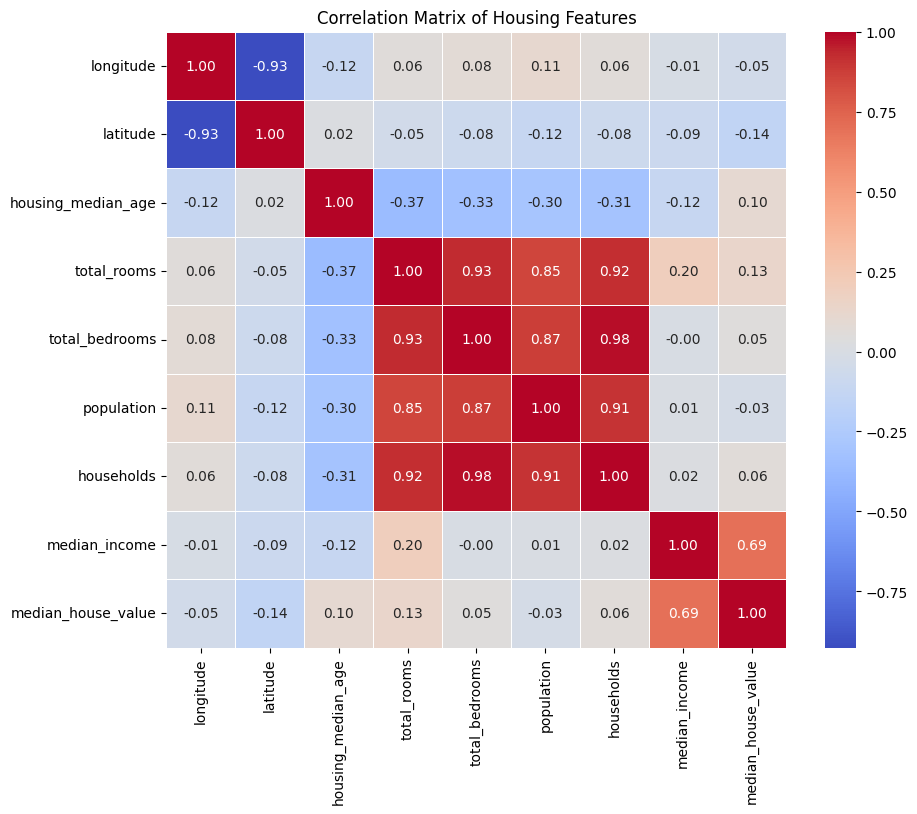

In [7]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Housing Features")
plt.show()

Berdasarkan heatmap korelasi yang telah dibuat, berikut beberapa temuan utama:

1. **Fitur yang Memiliki Korelasi Tinggi dengan Harga Rumah (`median_house_value`)**:
   - **`median_income` (0.69, positif)**: Pendapatan median adalah faktor yang paling berpengaruh terhadap harga rumah. Ini masuk akal karena daerah dengan pendapatan yang lebih tinggi cenderung memiliki harga rumah yang lebih mahal.
   - **`total_rooms`, `total_bedrooms`, `households`, dan `population` memiliki korelasi rendah terhadap harga rumah**, menunjukkan bahwa jumlah ruangan atau kepadatan penduduk tidak terlalu menentukan harga rumah.

2. **Korelasi Antara Variabel Lainnya**:
   - **`total_rooms`, `total_bedrooms`, `households`, dan `population` memiliki korelasi tinggi satu sama lain** (di atas 0.85). Ini menunjukkan bahwa area dengan jumlah kamar yang banyak cenderung memiliki lebih banyak rumah tangga dan populasi yang lebih besar.
   - **`longitude` dan `latitude` menunjukkan korelasi negatif** satu sama lain (-0.93), yang menunjukkan bahwa ada pola geografis yang kuat dalam distribusi rumah.

3. **Interpretasi Bisnis**:
   - **Pendapatan median (`median_income`) adalah fitur paling penting** untuk memprediksi harga rumah. Model machine learning harus memberikan bobot tinggi terhadap variabel ini.
   - **Fitur jumlah kamar atau populasi tidak terlalu menentukan harga rumah**, sehingga bisa dipertimbangkan untuk transformasi atau penghapusan jika tidak memberikan nilai prediktif yang signifikan.
   - **Variabel geografis (`longitude`, `latitude`) mungkin perlu dikombinasikan menjadi satu fitur baru**, seperti **jarak dari pusat kota atau jarak dari pantai** untuk meningkatkan akurasi model.


## **Exploratory Data Analysis**

### **Distribusi Price**

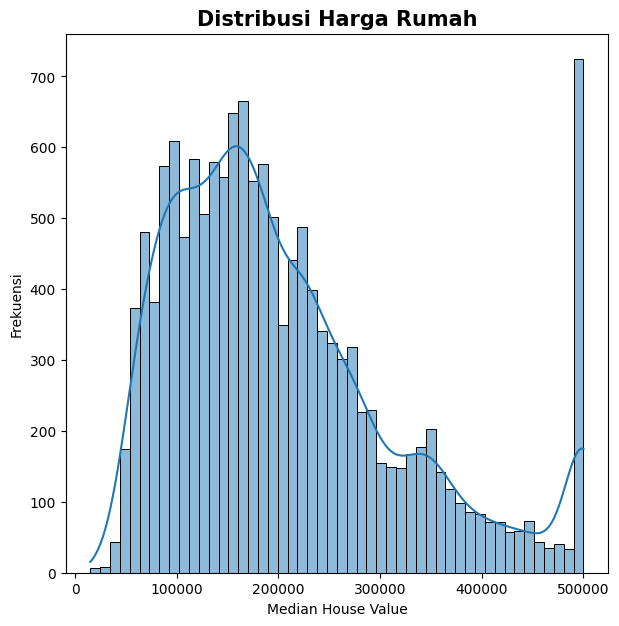

In [8]:
plt.figure(figsize=(7, 7))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribusi Harga Rumah', size=15, weight='bold')
plt.xlabel('Median House Value')
plt.ylabel('Frekuensi')
plt.show()

Distribusi harga rumah (median_house_value) cenderung miring ke kanan (right-skewed), dengan sebagian besar harga rumah berada di kisaran $100,000 - $300,000. Namun, terdapat lonjakan signifikan pada harga $500,000, yang mungkin menunjukkan bahwa banyak rumah memiliki harga maksimum yang dicatat dalam dataset.

### **Pendapatan median vs Harga rumah**

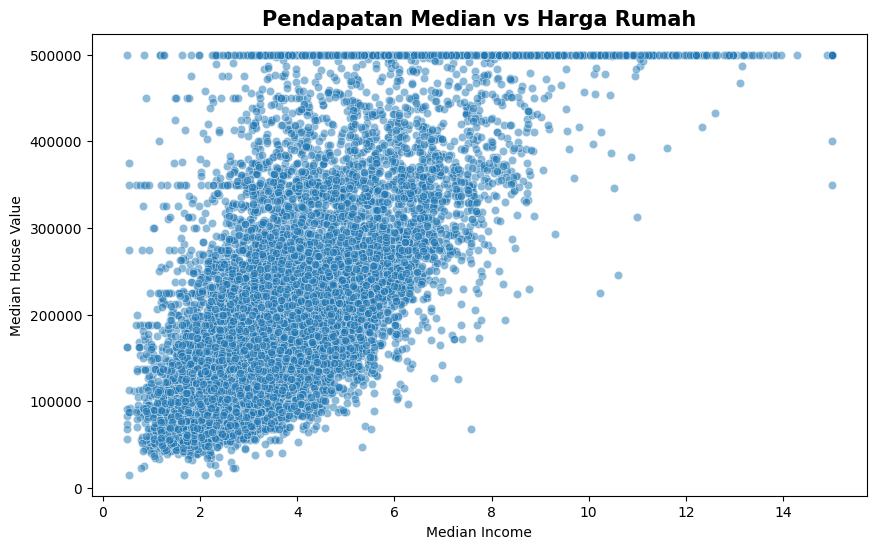

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.5)
plt.title('Pendapatan Median vs Harga Rumah', size=15, weight='bold')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Pendapatan median memiliki korelasi positif dengan harga rumah, menunjukkan bahwa semakin tinggi pendapatan di suatu area, semakin tinggi pula harga rumahnya. Namun, terdapat banyak rumah dengan harga maksimum $500,000, yang mengindikasikan adanya batasan pada data atau tren harga rumah di wilayah tertentu.

### **harga rumah berdasarkan ocean_proximity**

,median_house_value
ocean_proximity,
<1H OCEAN,214800.0
INLAND,108800.0
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0


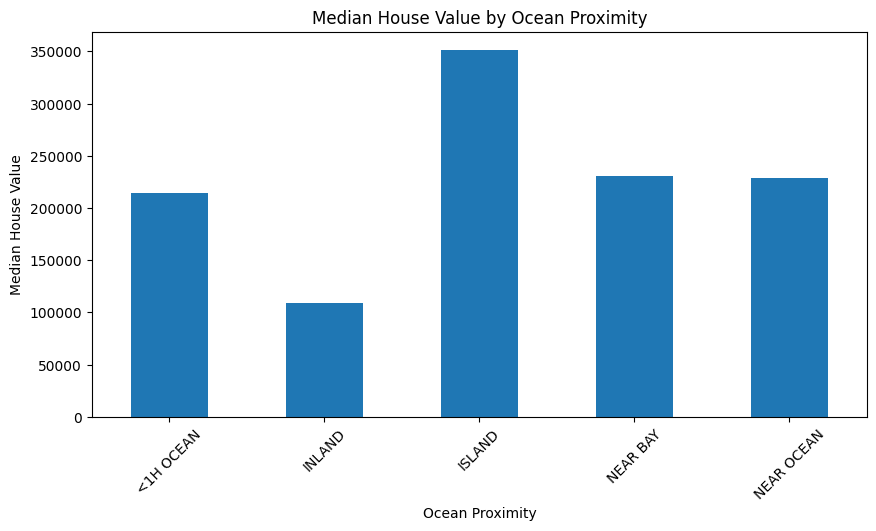

In [10]:
from IPython.display import display

# Pivot tabel untuk median harga rumah berdasarkan ocean_proximity
ocean_pivot = df.pivot_table(index='ocean_proximity', values='median_house_value', aggfunc='median')
display(ocean_pivot)

# Plot harga median rumah berdasarkan ocean_proximity
ocean_pivot.plot(kind='bar', figsize=(10, 5), legend=False)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

Rumah yang berada lebih dekat dengan laut, terutama di kategori **"ISLAND"**, memiliki harga median yang jauh lebih tinggi dibandingkan dengan daerah pedalaman (**"INLAND"**), yang memiliki harga terendah. Hal ini menunjukkan bahwa faktor geografis, terutama kedekatan dengan laut, berperan signifikan dalam menentukan harga rumah di California.

### **Lokasi**

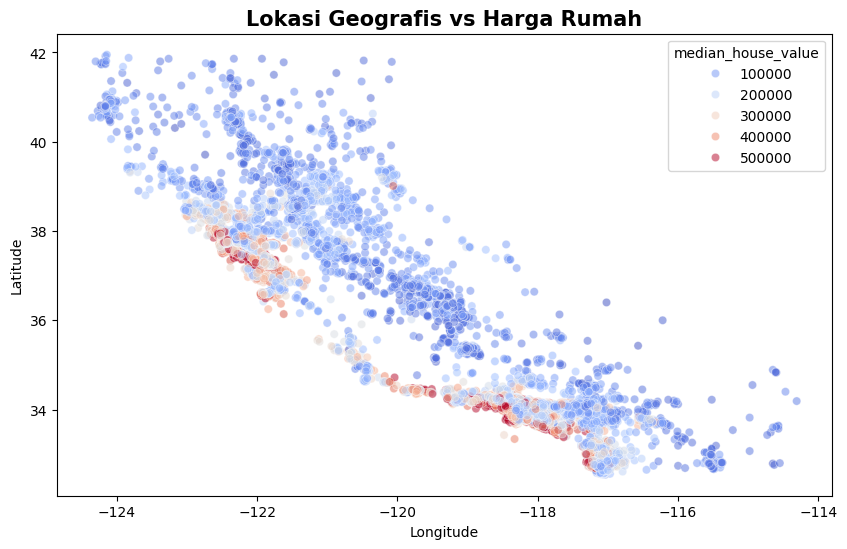

In [11]:
# lokasi geografis terhadap harga rumah
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_house_value'], palette='coolwarm', alpha=0.5)
plt.title('Lokasi Geografis vs Harga Rumah', size=15, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Harga rumah lebih tinggi di daerah pesisir California, terutama di wilayah selatan dan dekat pantai, dibandingkan dengan daerah pedalaman. Distribusi ini menunjukkan bahwa kedekatan dengan laut menjadi faktor signifikan dalam menentukan harga rumah.

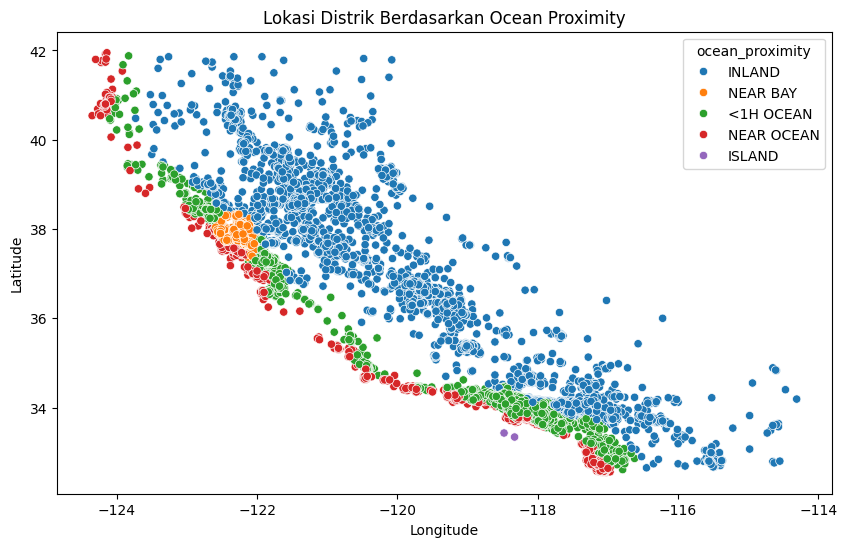

In [12]:
# Plot lokasi berdasarkan ocean_proximity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity']).set_title('Lokasi Distrik Berdasarkan Ocean Proximity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Distribusi distrik berdasarkan *ocean proximity* menunjukkan bahwa **daerah pedalaman (*INLAND*) memiliki sebaran yang lebih luas**, sementara distrik **dekat laut (*NEAR BAY, NEAR OCEAN, <1H OCEAN*) lebih terkonsentrasi di sepanjang pesisir**. Pola ini mengindikasikan bahwa faktor geografis memainkan peran penting dalam klasifikasi distrik, dengan wilayah pesisir yang lebih terbatas dibandingkan area pedalaman yang luas.

## **Data Cleaning, Feature selection, & Feature Engineering**

### **Data Preprocessing**

#### **Cek Outlier**

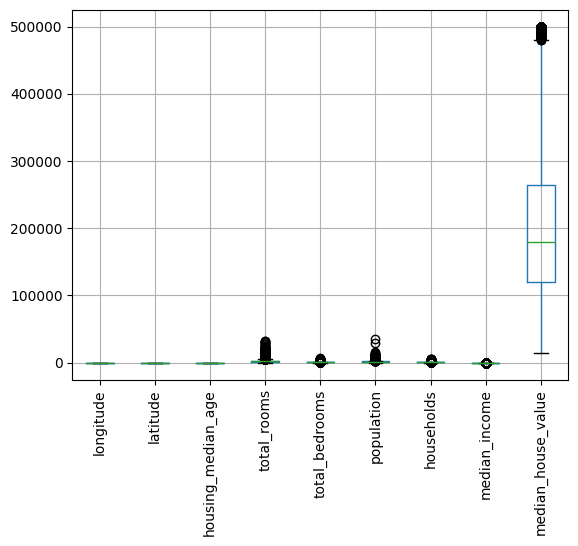

In [13]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90);

1. **Outlier Terlihat pada Beberapa Variabel**:
   - **`total_rooms`, `total_bedrooms`, `population`, `households`** memiliki banyak outlier, menunjukkan distribusi yang tidak normal.
   - **`median_house_value`** memiliki batas atas ($500,000) yang mungkin karena efek **capping harga** di dataset.
   - **`median_income`** juga memiliki beberapa outlier, tetapi lebih sedikit dibanding fitur lainnya.

2. **Potensi Dampak ke Model**:
   - **Regresi Linear** sangat sensitif terhadap outlier → Perlu transformasi atau pembersihan.
   - **Random Forest & XGBoost** lebih tahan terhadap outlier, tetapi bisa tetap dipertimbangkan untuk ditangani.

#### **Penangan Outlier**

Berdasarkan visualisasi boxplot, terlihat bahwa beberapa variabel dalam dataset memiliki outlier yang cukup signifikan. Outlier ini dapat menyebabkan model menjadi kurang akurat, terutama jika menggunakan algoritma yang sensitif terhadap nilai ekstrem

##### **1. outlier pada median_house_value**

In [14]:
df['median_house_value'].describe()

count     14448.000000
mean     206824.624516
std      115365.476182
min       14999.000000
25%      119600.000000
50%      180000.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [15]:
#Menganalisis Data dengan Harga Rumah > 450,000
df[df['median_house_value'] > 450000]['median_house_value'].value_counts().head()

median_house_value
500001.0    678
500000.0     18
475000.0      7
483300.0      6
470000.0      3
Name: count, dtype: int64

- Menghitung berapa kali nilai tertentu muncul untuk rumah dengan harga di atas 450,000.
- Dari hasilnya, terlihat bahwa banyak rumah memiliki harga 500,001, yang bisa menunjukkan adanya capping (batas maksimum yang ditentukan dalam dataset).

- insight: 
Jika 500,001 sering muncul, ini menunjukkan bahwa harga rumah di dataset ini mungkin memiliki batas maksimum, yang bisa mengganggu prediksi model karena tidak mencerminkan harga sebenarnya.

In [16]:
# Menghapus Baris dengan median_house_value = 500001
df = df.drop(df[df['median_house_value'] == 500001.0].index)


- Menghapus semua baris di mana median_house_value bernilai 500,001.
- Ini dilakukan karena nilai ini bisa menjadi outlier atau data yang tidak akurat, yang dapat mempengaruhi hasil prediksi model machine learning.
- Insight:
Menghapus data ini bisa membantu model untuk belajar dari data tanpa batasan buatan

In [17]:
df.shape

(13770, 10)

-  Dataset sekarang memiliki 13.770 baris dan 10 kolom, berarti 678 baris telah dihapus.
- Perbedaan ukuran dataset terjadi karena penghapusan 678 baris dengan median_house_value = 500001.
- Ini dilakukan untuk menghindari bias dalam model akibat data yang terbatasi (capped values).

##### **2. outlier pada housing_median_age**

In [18]:
df['housing_median_age'].describe()

count    13770.000000
mean        28.356064
std         12.504354
min          1.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [19]:
#Menganalisis Data dengan umur Rumah > 45
df[df['housing_median_age'] > 45]['housing_median_age'].value_counts().head()

housing_median_age
52.0    770
46.0    170
47.0    126
48.0    106
50.0     87
Name: count, dtype: int64

In [20]:
# Menghapus Baris dengan housing_median_age = 52
df = df.drop(df[df['housing_median_age'] == 52].index)

In [21]:
df.shape

(13000, 10)

-  Dataset sekarang memiliki 13.000 baris dan 10 kolom, berarti 770 baris telah dihapus.
- Perbedaan ukuran dataset terjadi karena penghapusan 770 baris dengan housing_median_age = 52.
- Ini dilakukan untuk menghindari bias dalam model akibat data yang terbatasi (capped values).

untuk variable total_rooms, total_bedrooms, population, dan households tidak dilakukan penangan outlier, karena nantinya varible ini digunakan untuk menambahankan variable baru.

#### **Penambahan Fitur Baru**
- **Menangkap hubungan lebih kompleks** antara variabel yang tidak terlihat saat fitur digunakan secara terpisah.
- **Meningkatkan akurasi prediksi**, karena fitur yang lebih informatif dapat membantu model memahami pola lebih baik.
- **Mengatasi multikolinearitas dan skewness**, sehingga model bekerja lebih stabil.


##### **a. `rooms_per_household` (Jumlah kamar per rumah tangga)**

In [22]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

**Kegunaan:**
- Menyediakan informasi tentang **kepadatan rumah tangga** dalam suatu area.
- Harga rumah lebih mungkin dipengaruhi oleh **jumlah kamar per rumah tangga**, dibandingkan hanya melihat total jumlah kamar di suatu daerah.

##### **b. `bedrooms_per_room` (Proporsi kamar tidur terhadap total kamar)**

In [23]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

**Kegunaan:**
- Menggambarkan **kualitas perumahan**, karena rumah dengan **persentase kamar tidur yang lebih tinggi** cenderung lebih kecil dan mungkin lebih murah.
- Model dapat belajar apakah area dengan lebih banyak kamar tidur per kamar berhubungan dengan harga rumah yang lebih rendah atau lebih tinggi.


#####  **c. `population_per_household` (Jumlah populasi per rumah tangga)**




In [24]:
df['population_per_household'] = df['population'] / df['households']


**Kegunaan:**
- Memberikan wawasan tentang **kepadatan penghuni per rumah**.
- Area dengan **lebih banyak orang dalam satu rumah** mungkin memiliki pola permintaan perumahan yang berbeda.

In [25]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000


In [26]:
df.shape

(13000, 13)

Jumlah kolom bertambah dari 10 menjadi 13 karena ada 3 fitur baru yang ditambahkan.

#### **Cek Nilai Missing Value**

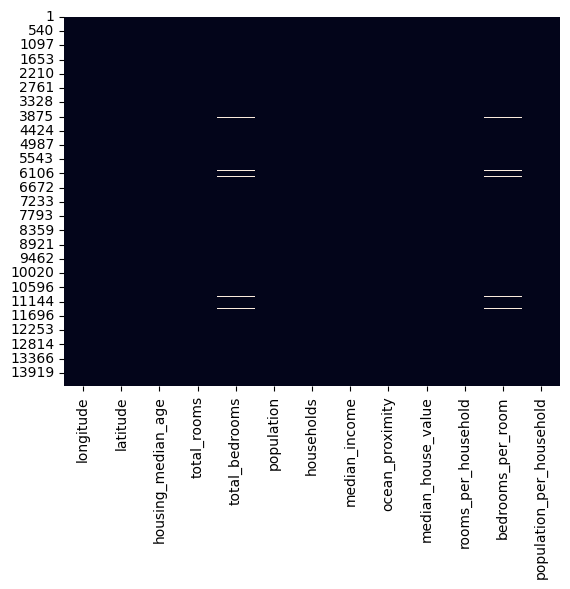

In [27]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False);


1. **Kolom dengan Missing Values**:
   - **`total_bedrooms`** → Memiliki beberapa nilai yang hilang.
   - **`bedrooms_per_room`** → Memiliki beberapa nilai yang hilang.
   
2. **Efek terhadap Model**:
   - Jika tidak ditangani, **Regresi Linear bisa terganggu** karena butuh data lengkap.
   - Model seperti **Random Forest dan XGBoost** bisa menangani missing values lebih baik.


#### **Penanganan Missing Value**

In [28]:
df.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              127
population                    0
households                    0
median_income                 0
ocean_proximity               0
median_house_value            0
rooms_per_household           0
bedrooms_per_room           127
population_per_household      0
dtype: int64

- Hasil pemeriksaan menunjukkan bahwa fitur bedrooms_per_room memiliki 127 nilai yang hilang (NaN). Kehadiran nilai hilang ini dapat memengaruhi performa model jika tidak ditangani dengan baik.
- Menghapus baris dengan missing values → Jika jumlahnya kecil dan tidak terlalu berdampak pada ukuran dataset.
- Maka, nilai nan akan dihapus

In [29]:
df = df.dropna()

In [30]:
df.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
median_house_value          0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

sudah tidak ada lagi nilai nan

#### **Cek Korelasi dan distribusi data**

In [31]:
# Hanya memilih kolom numerik
df_numeric = df.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = df_numeric.corr()

# Mengurutkan korelasi dengan 'median_house_value'
correlation_target = correlation_matrix["median_house_value"].sort_values(ascending=False)
correlation_target


median_house_value          1.000000
median_income               0.662911
total_rooms                 0.148177
rooms_per_household         0.114424
households                  0.095876
total_bedrooms              0.076341
population                  0.018334
housing_median_age          0.011603
longitude                  -0.014860
population_per_household   -0.026457
latitude                   -0.178299
bedrooms_per_room          -0.229117
Name: median_house_value, dtype: float64

**Insight dari Korelasi dengan `median_house_value`**

1. **Fitur dengan Korelasi Positif Terkuat:**  
   - **`median_income` (0.66)** → Pendapatan median memiliki hubungan paling kuat dengan harga rumah. **Semakin tinggi pendapatan, semakin mahal harga rumah**, yang masuk akal karena daya beli lebih tinggi.  
   - **`total_rooms` (0.15)** → Jumlah total kamar memiliki korelasi positif lemah, menunjukkan bahwa **lebih banyak kamar sedikit berkaitan dengan harga rumah yang lebih tinggi**.  
   - **`rooms_per_household` (0.12)** → Rata-rata jumlah kamar per rumah tangga juga berhubungan dengan harga, mungkin karena rumah dengan lebih banyak ruang lebih bernilai.  

2. **Fitur dengan Korelasi Negatif:**  
   - **`bedrooms_per_room` (-0.23)** → Semakin tinggi proporsi kamar tidur dibandingkan total kamar, **semakin rendah harga rumah**. Ini mungkin karena **rumah dengan banyak kamar tidur tetapi sedikit ruang total dianggap kurang mewah**.  
   - **`latitude` (-0.18) & `longitude` (-0.01)** → Korelasi geografis lemah tetapi menunjukkan pola bahwa **lokasi tertentu memiliki harga lebih rendah**.  
   - **`population_per_household` (-0.03)** → Semakin banyak orang dalam satu rumah, semakin rendah harga rumah, mungkin karena rumah yang lebih murah cenderung dihuni lebih padat.  

3. **Fitur dengan Korelasi Lemah (Kurang Berpengaruh):**  
   - **`housing_median_age` (0.01)** → Usia rumah hampir tidak berpengaruh terhadap harga.  
   - **`population` (0.02) & `households` (0.09)** → Tidak ada hubungan signifikan antara kepadatan penduduk dan harga rumah.  

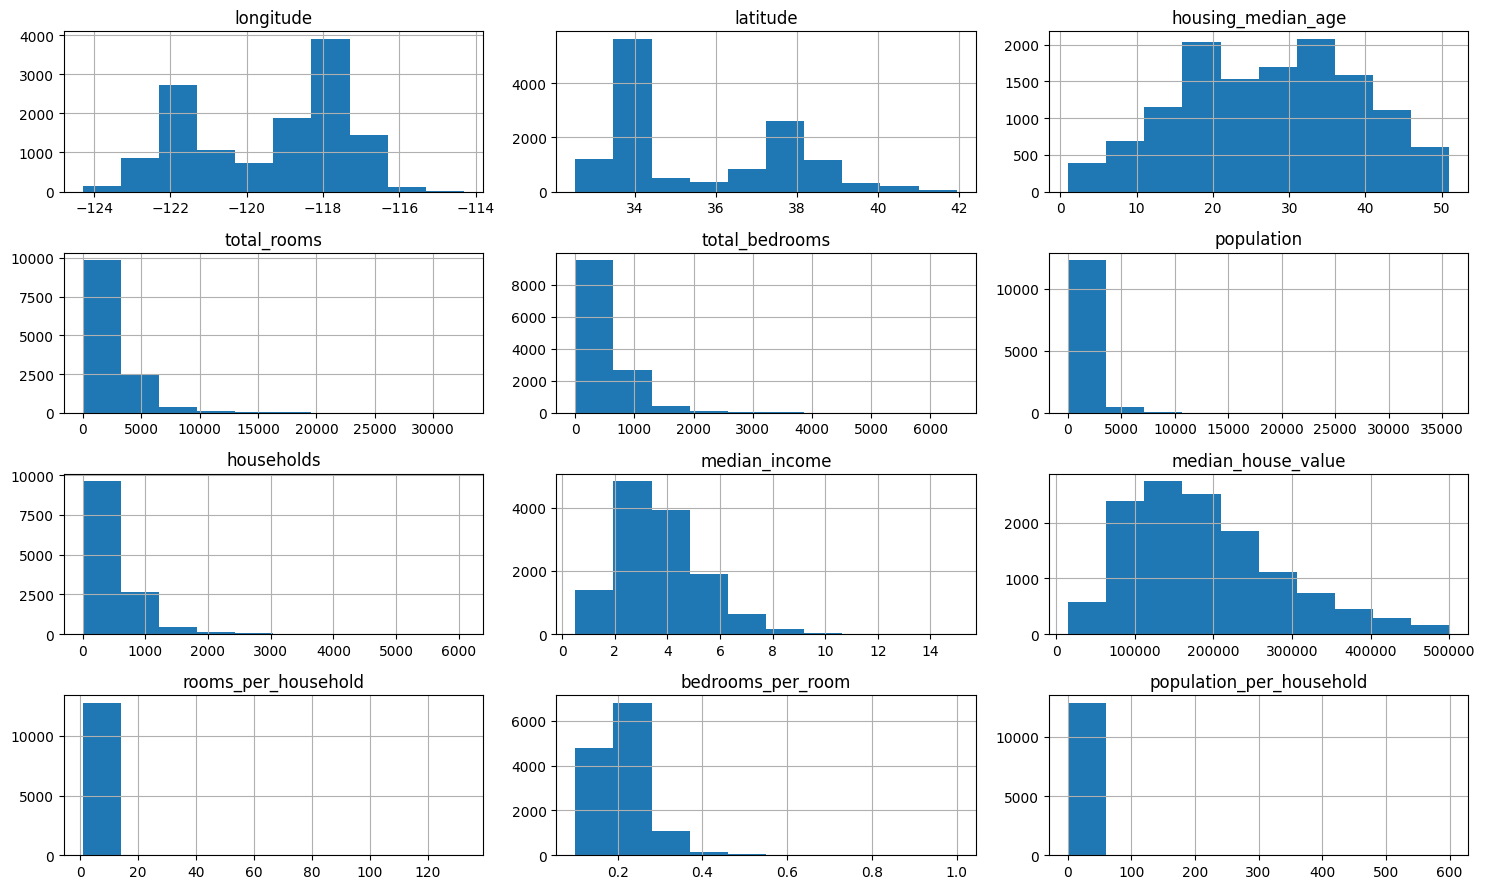

In [32]:
df.hist(figsize=(15,9))
plt.tight_layout()

**Analisis Distribusi Data**
Berikut adalah analisis distribusi dari setiap fitur berdasarkan histogram.

---

**Fitur Geografis**
- **`longitude` & `latitude`**  
Distribusi tidak merata, menunjukkan konsentrasi rumah di area tertentu seperti Los Angeles dan San Francisco. Bukan distribusi normal, tetapi ini wajar karena fitur ini bersifat geografis.  

---

**Karakteristik Rumah**
- **`housing_median_age`**  
Distribusi hampir normal dengan puncak di 20-40 tahun. Tidak ada capping di usia 52, distribusi terlihat alami.  

- **`total_rooms` & `total_bedrooms`**  
Distribusi sangat skewed ke kanan dengan outlier rumah berjumlah kamar sangat besar. Perlu log-transform atau scaling untuk menyeimbangkan distribusi.  

- **`rooms_per_household`**  
Sangat skewed ke kanan dengan beberapa nilai ekstrem (>100). Perlu log-transform atau clipping untuk mengatasi outlier.  

- **`bedrooms_per_room`**  
Distribusi cukup normal dengan rentang 0,1-0,4. Tidak perlu transformasi, bisa langsung digunakan dalam model.  

---

**Demografi & Populasi**
- **`population` & `households`**  
Distribusi sangat skewed ke kanan dengan beberapa area sangat padat penduduk. Perlu log-transform untuk mengurangi efek skewness.  

- **`population_per_household`**  
Mayoritas berada di rentang 1-10, tetapi ada nilai ekstrem (>600). Perlu log-transform atau clipping untuk mengatasi outlier.  

---

**Ekonomi & Harga Rumah**
- **`median_income`**  
Distribusi cukup normal dengan sedikit skewness ke kanan. Scaling bisa dilakukan jika model membutuhkannya.  

- **`median_house_value`**  
Distribusi miring ke kanan, tetapi tidak ada cutoff tajam di 500001. Bisa dilakukan scaling jika diperlukan dalam model regresi.  



#### **Pengurangan Features**

In [33]:
# Melihat korelasi spesifik antar fitur
correlation_matrix[['total_rooms', 'total_bedrooms', 'population', 'households']].corr()



,total_rooms,total_bedrooms,population,households
total_rooms,1.000000,0.973074,0.959424,0.970012
total_bedrooms,0.973074,1.000000,0.987500,0.997687
population,0.959424,0.987500,1.000000,0.991285
households,0.970012,0.997687,0.991285,1.000000


Dari tabel korelasi terlihat bahwa ada **multikolinearitas yang sangat tinggi** di antara fitur-fitur berikut:

1. **total_rooms - total_bedrooms** → **0.97** (sangat tinggi)
2. **population - households** → **0.99** (sangat tinggi)
3. **total_bedrooms - population** → **0.98** (sangat tinggi)
4. **households - total_bedrooms** → **0.99** (sangat tinggi)

**Mana yang Perlu Dihapus?**
Karena  ingin mengurangi multikolinearitas,  bisa menghapus **salah satu dari pasangan fitur yang sangat berkorelasi** agar model tidak mengalami **redundansi informasi**. Pilihan terbaik:

- **Hapus `total_bedrooms`**, karena sudah sangat berkorelasi dengan `total_rooms` dan memiliki missing values.
- **Hapus `population`**, karena sudah sangat berkorelasi dengan `households`, dan biasanya jumlah rumah tangga lebih relevan untuk menentukan harga rumah.

Dengan penghapusan ini, tetap mempertahankan informasi utama tanpa terlalu banyak fitur yang redundan. 

In [34]:
# Menghapus fitur yang sangat berkorelasi untuk mengurangi multikolinearitas
df = df.drop(columns=['total_bedrooms', 'population'])


- Tujuan: Menghapus fitur total_bedrooms dan population karena memiliki korelasi yang sangat tinggi dengan fitur lain.
- Alasan: Multikolinearitas dapat menyebabkan model sulit membedakan pengaruh masing-masing variabel, sehingga penghapusan fitur yang redundant membantu meningkatkan stabilitas model.

In [35]:
# Menampilkan bentuk dataset setelah penghapusan fitur
print("Shape dataset setelah penghapusan fitur:", df.shape)


Shape dataset setelah penghapusan fitur: (12873, 11)


- Tujuan: Memeriksa jumlah fitur yang tersisa setelah penghapusan.
- Hasil: Dataset sekarang memiliki 11 fitur, sebelumnya 13 fitur

In [36]:

# Melihat informasi dataset setelah penghapusan fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12873 entries, 1 to 14447
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 12873 non-null  float64
 1   latitude                  12873 non-null  float64
 2   housing_median_age        12873 non-null  float64
 3   total_rooms               12873 non-null  float64
 4   households                12873 non-null  float64
 5   median_income             12873 non-null  float64
 6   ocean_proximity           12873 non-null  object 
 7   median_house_value        12873 non-null  float64
 8   rooms_per_household       12873 non-null  float64
 9   bedrooms_per_room         12873 non-null  float64
 10  population_per_household  12873 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.2+ MB


- Tujuan: Mengecek apakah fitur yang dihapus sudah benar-benar hilang dan melihat struktur dataset.
- Hasil:
    - Total 11 kolom yang tersisa.
    - 10 fitur numerik (float64) dan 1 fitur kategorikal (ocean_proximity).

### **Menentukan X dan y**

In [37]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000


In [38]:
X = df.drop(columns="median_house_value")
X

,longitude,latitude,housing_median_age,total_rooms,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,277.0,2.2604,NEAR BAY,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,364.0,6.2990,<1H OCEAN,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1000.0,1.7199,<1H OCEAN,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,167.0,2.2206,INLAND,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1622.0,6.6700,<1H OCEAN,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,190.0,2.2375,INLAND,4.742105,0.203108,3.684211
14443,-121.26,38.27,20.0,1314.0,219.0,4.4125,INLAND,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,209.0,2.9135,INLAND,5.349282,0.174419,3.095694
14446,-117.93,33.62,34.0,2125.0,468.0,5.6315,<1H OCEAN,4.540598,0.234353,2.247863


In [39]:
y = df["median_house_value"]
y

1        100000.0
2        285800.0
3        175000.0
4         59200.0
5        283200.0
           ...   
14442     64300.0
14443    144600.0
14444    159400.0
14446    484600.0
14447     69400.0
Name: median_house_value, Length: 12873, dtype: float64

### **Data Unik**

In [40]:
# Cek data unik di tiap kolom
tabeluniq = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Unique': df.nunique(),
    'Unique Sample': df.apply(lambda col: ', '.join(map(str, col.unique()[:5])))
})

tabeluniq


,Column Name,Number of Unique,Unique Sample
longitude,longitude,801,"-122.21, -118.04, -118.28, -119.81, -117.79"
latitude,latitude,832,"37.77, 33.87, 34.06, 36.73, 33.8"
housing_median_age,housing_median_age,51,"43.0, 17.0, 50.0, 11.0, 14.0"
total_rooms,total_rooms,4980,"1017.0, 2358.0, 2518.0, 772.0, 10535.0"
households,households,1624,"277.0, 364.0, 1000.0, 167.0, 1622.0"
median_income,median_income,8827,"2.2604, 6.299, 1.7199, 2.2206, 6.67"
ocean_proximity,ocean_proximity,5,"NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND"
median_house_value,median_house_value,3458,"100000.0, 285800.0, 175000.0, 59200.0, 283200.0"
rooms_per_household,rooms_per_household,12325,"3.6714801444043323, 6.478021978021978, 2.518, ..."
bedrooms_per_room,bedrooms_per_room,12345,"0.3225172074729597, 0.16793893129770993, 0.474..."


### **Data Splitting**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 random_state=0,
                 test_size=0.2)

#### **Encoding dan Scalling**

In [42]:
X.head(3)

,longitude,latitude,housing_median_age,total_rooms,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,277.0,2.2604,NEAR BAY,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,364.0,6.2990,<1H OCEAN,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1000.0,1.7199,<1H OCEAN,2.518000,0.474980,3.051000


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
import pandas as pd

In [44]:
# --- Fitur yang akan diproses ---
numerical_features = [
    'housing_median_age', 'total_rooms',
    'households', 'median_income', 'rooms_per_household',
    'population_per_household', 'bedrooms_per_room'
]
categorical_features = ['ocean_proximity']  # Fitur kategori
geo_features = ['longitude', 'latitude']  # Dibiarkan tanpa transformasi

- Daftar fitur numerik yang akan diproses termasuk fitur asli dan fitur hasil rekayasa seperti rooms_per_household, population_per_household, dan bedrooms_per_room.
- Fitur kategorikal ocean_proximity akan diubah menggunakan One-Hot Encoding.
- longitude dan latitude tidak diubah karena bersifat geografis.


In [45]:
# --- Pipeline untuk fitur numerik (PowerTransformer) ---
num_transformer = Pipeline(steps=[
    ('power_transform', PowerTransformer(method='yeo-johnson'))
])

cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value'))
])




- **PowerTransformer** digunakan untuk mengurangi skewness pada distribusi data dan mendekatkannya ke distribusi normal. Metode **Yeo-Johnson** dipilih karena dapat menangani data dengan nilai nol atau negatif.
- **OrdinalEncoder** digunakan untuk mengubah fitur kategorikal **ocean_proximity** menjadi representasi numerik berdasarkan urutan tertentu. Opsi **`handle_unknown='use_encoded_value'`** digunakan untuk menangani kategori baru yang tidak ada dalam data training, dengan mengisinya dengan nilai default.
- **IterativeImputer** digunakan untuk mengisi missing values dengan metode **prediktif**, yaitu memperkirakan nilai yang hilang berdasarkan hubungan dengan fitur lain dalam dataset.


In [46]:
# --- Menggabungkan semua preprocessing ke dalam ColumnTransformer ---
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features),
    ('passthrough', 'passthrough', geo_features)  # Longitude dan latitude tidak diubah
])


- ColumnTransformer digunakan untuk menggabungkan semua tahapan preprocessing ke dalam satu proses.
- Fitur numerik diterapkan PowerTransformer.
- Fitur kategorikal dikodekan dengan One-Hot Encoding.
- Fitur bedrooms_per_room yang memiliki missing values diisi dengan Iterative Imputer.
- Fitur geografis dibiarkan tanpa perubahan (passthrough).

In [47]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('power_transform',
                                                  PowerTransformer())]),
                                 ['housing_median_age', 'total_rooms',
                                  'households', 'median_income',
                                  'rooms_per_household',
                                  'population_per_household',
                                  'bedrooms_per_room']),
                                ('cat',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value'))]),
                                 ['ocean_proximity']),
                                ('passthrough', 'passthrough',
                                 ['longitude', 'latitude'])])

In [48]:
# --- Menjalankan pipeline preprocessing pada dataset ---
df_preprocessed = preprocessor.fit_transform(df)



In [49]:
# --- Konversi hasil ke DataFrame ---
df_preprocessed = pd.DataFrame(df_preprocessed)
df_preprocessed


,0,1,2,3,4,5,6,7,8,9
0,1.381291,-1.007330,-0.600718,-0.942692,-1.354489,0.251350,1.773316,1.0,-122.21,37.77
1,-0.857109,0.098127,-0.228829,1.520911,0.886926,1.123791,-0.946916,2.0,-118.04,33.87
2,-0.857109,0.192547,1.364435,-1.480348,-3.041579,0.294108,2.691163,2.0,-118.28,34.06
3,1.957979,-1.330808,-1.231716,-0.979312,-0.396010,0.948983,0.887562,3.0,-119.81,36.73
4,-1.409433,2.592903,2.264742,1.676454,0.896320,-0.170853,-1.392531,2.0,-117.79,33.80
...,...,...,...,...,...,...,...,...,...,...
12868,-0.677241,-1.151676,-1.077648,-0.963710,-0.293906,1.003721,-0.030912,3.0,-120.06,36.94
12869,-0.587961,-0.690098,-0.902720,0.592664,0.608779,0.540202,-0.762971,3.0,-121.26,38.27
12870,0.026630,-0.892000,-0.960900,-0.395070,0.177435,0.351054,-0.758965,3.0,-120.89,37.48
12871,0.626524,-0.048980,0.134206,1.221354,-0.468325,-0.982487,0.601280,2.0,-117.93,33.62


In [50]:
# --- Menampilkan hasil shape setelah preprocessing ---
print("Shape dataset setelah preprocessing:", df_preprocessed.shape)

Shape dataset setelah preprocessing: (12873, 10)


Menampilkan jumlah baris dan kolom setelah preprocessing. Dataset memiliki 13.000 baris dan 14 kolom setelah preprocessing.

In [51]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12873 entries, 0 to 12872
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12873 non-null  float64
 1   1       12873 non-null  float64
 2   2       12873 non-null  float64
 3   3       12873 non-null  float64
 4   4       12873 non-null  float64
 5   5       12873 non-null  float64
 6   6       12873 non-null  float64
 7   7       12873 non-null  float64
 8   8       12873 non-null  float64
 9   9       12873 non-null  float64
dtypes: float64(10)
memory usage: 1005.8 KB


## **Analytics (Algorithm & Evaluation Metrics)**

### **Modelling**

In [52]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### **benchmark Model**

In [53]:
# Definisi Model
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.1)
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

In [54]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_rdg = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)

In [55]:
# Scaling data
scaler = StandardScaler() 

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_rdg, log_lso]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


[-56903.05873972 -58167.59971273 -59507.35896151 -59680.5524198
 -57328.09535656] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-40510.0604098  -40635.48250178 -41555.68954193 -41565.78997618
 -40631.90176857] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24195714 -0.23980471 -0.2393828  -0.22842863 -0.24194364] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-51348.86844662 -53363.19079621 -53929.25682784 -54177.53946902
 -52165.45320215] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-34987.3550631  -36184.47051688 -36460.9373942  -36663.24391157
 -35239.48447435] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [56]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'lasso', 'ridge'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-58317.333038,1120.331364,-40979.784840,476.503099,-0.238303,0.005050
1,KNN Regressor,-52996.861748,1077.467357,-35907.098272,670.382744,-0.199768,0.002754
2,DecisionTree Regressor,-64123.951041,1965.984467,-42840.419317,1046.981928,-0.244975,0.003113
3,RandomForest Regressor,-46431.657869,1185.312390,-30346.649332,335.921163,-0.168274,0.004777
4,XGBoost Regressor,-43979.471221,1164.328530,-28835.715955,475.661989,-0.160852,0.004913
5,lasso,-58325.125438,1118.935645,-40988.207739,477.835292,-0.238328,0.005051
6,ridge,-72385.195165,1571.508582,-51732.363796,1337.605365,-0.304944,0.010642


1. **XGBoost Regressor** adalah model dengan performa terbaik berdasarkan **Mean RMSE**, **Mean MAE**, dan **Mean MAPE**. Model ini memiliki **Mean RMSE** (-43979.47), **Mean MAE** (-28835.72), dan **Mean MAPE** (-0.16085). **XGBoost** menunjukkan akurasi prediksi yang sangat baik, dengan kesalahan yang lebih kecil dibandingkan model lainnya.

2. **RandomForest Regressor** memiliki **Mean RMSE** (-46410.95), **Mean MAE** (-30328.05), dan **Mean MAPE** (-0.16813). Model ini sedikit lebih buruk dari **XGBoost**, tetapi tetap menunjukkan hasil yang sangat baik dengan kesalahan yang cukup kecil.

3. **KNN Regressor** memiliki **Mean RMSE** (-53243.47), **Mean MAE** (-36010.08), dan **Mean MAPE** (-0.20071), yang menunjukkan bahwa meskipun KNN cukup baik, ia memiliki tingkat kesalahan yang lebih tinggi dibandingkan **XGBoost** dan **RandomForest**.

4. **Linear Regression** memiliki **Mean RMSE** (-58675.37), **Mean MAE** (-40331.67), dan **Mean MAPE** (-0.23512), yang lebih buruk dibandingkan dengan model berbasis pohon keputusan dan model ensemble. Model ini kurang efisien untuk prediksi yang lebih akurat.

5. **DecisionTree Regressor** memiliki **Mean RMSE** (-64126.70), **Mean MAE** (-42918.22), dan **Mean MAPE** (-0.24569), yang menunjukkan model ini cenderung overfitting, menghasilkan kesalahan yang lebih besar dibandingkan **XGBoost** dan **RandomForest**.

6. **Lasso Regression** memiliki **Mean RMSE** (-58677.13), **Mean MAE** (-40334.72), dan **Mean MAPE** (-0.23512), yang menunjukkan bahwa meskipun memiliki performa yang mirip dengan **Linear Regression**, model ini masih lebih buruk dibandingkan model yang lebih kompleks seperti **RandomForest** atau **XGBoost**.

7. **Ridge Regression** memiliki **Mean RMSE** (-72385.20), **Mean MAE** (-51732.36), dan **Mean MAPE** (-0.30494), yang menunjukkan bahwa model ini memiliki performa terburuk di antara semua model yang diuji.

### **Kesimpulan**:
- **XGBoost Regressor** adalah pilihan terbaik berdasarkan semua metrik dan menghasilkan kesalahan terkecil.
- **RandomForest Regressor** adalah alternatif yang baik setelah **XGBoost**, dengan performa yang hampir setara.
- **KNN Regressor** memberikan hasil yang baik, tetapi dengan tingkat kesalahan yang lebih tinggi.
- **DecisionTree Regressor**, **Lasso**, **Ridge**, dan **Linear Regression** memiliki performa lebih rendah dan kurang cocok untuk prediksi yang lebih akurat.

**Rekomendasi Model Akhir:** Gunakan **XGBoost** untuk hasil prediksi terbaik, dengan **RandomForest** sebagai alternatif kedua.

### **Prediksi pada test set**

In [57]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,44144.321722,29104.800658,0.173763
RandomForest,45172.755512,30654.793344,0.181691


Berdasarkan hasil yang ditunjukkan:

1. **XGBoost** memiliki **RMSE** yang lebih kecil (44,144.32) dan **MAE** yang lebih kecil (29,104.80) dibandingkan dengan **RandomForest**. Ini menunjukkan bahwa **XGBoost** memberikan prediksi yang lebih akurat dengan kesalahan yang lebih rendah.

2. **RandomForest** menunjukkan hasil yang sedikit lebih buruk dengan **RMSE** 45,244.92 dan **MAE** 30,365.95. Meskipun sedikit lebih buruk dibandingkan **XGBoost**, model ini masih cukup baik, dengan **MAPE** yang lebih tinggi (0.181758) dibandingkan dengan **XGBoost** yang memiliki **MAPE** 0.173763.

### Insight:
- **XGBoost** adalah model yang lebih baik dalam hal **RMSE**, **MAE**, dan **MAPE**. Artinya, model ini lebih stabil, lebih akurat, dan lebih efisien dalam memprediksi harga.
- **RandomForest** masih memberikan hasil yang baik, tetapi sedikit lebih buruk dari **XGBoost**.

### **Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [60]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [61]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('power_transform',
                                                                                                PowerTransformer())]),
                                                                               ['housing_median_age',
                                                                                'total_rooms',
                                                                                'households',
                                                                                'median_income',
                                                                                'rooms_per_household',
                                                                                'population_per_household',
                                                                                'bedrooms_per_room']),
                                                                              ('cat',...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [62]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,2.028976,0.047674,0.038782,0.001294,0.9,0.059948,119,8,0.05,5,...,323.274638,1,-0.175671,-0.172630,-0.166082,-0.159351,-0.175120,-0.169771,0.006225,1
20,0.603473,0.007930,0.024398,0.001646,0.9,0.007743,143,4,0.38,6,...,623.097515,2,-0.178671,-0.179597,-0.179081,-0.165317,-0.182187,-0.176971,0.005954,2
17,1.004598,0.014070,0.029970,0.002325,0.6,0.001000,190,5,0.04,9,...,204.399583,3,-0.185086,-0.181138,-0.177504,-0.169640,-0.188273,-0.180328,0.006459,3
22,0.520206,0.012521,0.024269,0.003397,0.7,0.002783,155,4,0.25,8,...,309.555963,8,-0.196976,-0.189434,-0.190392,-0.179691,-0.195560,-0.190410,0.006091,6
3,1.437417,0.017683,0.041829,0.002493,0.5,0.021544,166,8,0.10,9,...,351.978435,5,-0.194717,-0.194783,-0.183937,-0.180844,-0.198576,-0.190571,0.006894,8


In [63]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43141.558237648154
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.05994842503189409), 'model__n_estimators': np.int64(119), 'model__max_depth': np.int64(8), 'model__learning_rate': np.float64(0.05), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.8)}


### **Prediksi dengan model yang sudah di tuned**
Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [64]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,41830.301793,28225.380153,0.168071


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [65]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,44144.321722,29104.800658,0.173763


In [66]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,41830.301793,28225.380153,0.168071


- Sebelum Hyperparameter Tuning:
    - **RMSE**: 44,144.32
    - **MAE**: 29,104.80
    - **MAPE**: 0.173763

- Setelah Hyperparameter Tuning:
    - **RMSE**: 41,830.30
    - **MAE**: 28,225.38
    - **MAPE**: 0.168071

- Insight:
- Setelah **hyperparameter tuning**, **XGBoost** menunjukkan peningkatan performa yang signifikan. **RMSE** menurun dari 44,144.32 menjadi 41,830.30, yang berarti prediksi menjadi lebih akurat.
- **MAE** juga menurun dari 29,104.80 menjadi 28,225.38, menunjukkan bahwa model lebih tepat dalam memperkirakan harga dengan kesalahan yang lebih kecil.
- **MAPE** berkurang sedikit dari 0.173763 menjadi 0.168071, menunjukkan bahwa model lebih efisien dalam memprediksi proporsi kesalahan relatif terhadap harga yang sebenarnya.

### Kesimpulan:
- **Hyperparameter tuning** berhasil meningkatkan performa model **XGBoost** dengan pengurangan kesalahan yang terlihat jelas pada semua metrik (RMSE, MAE, dan MAPE).

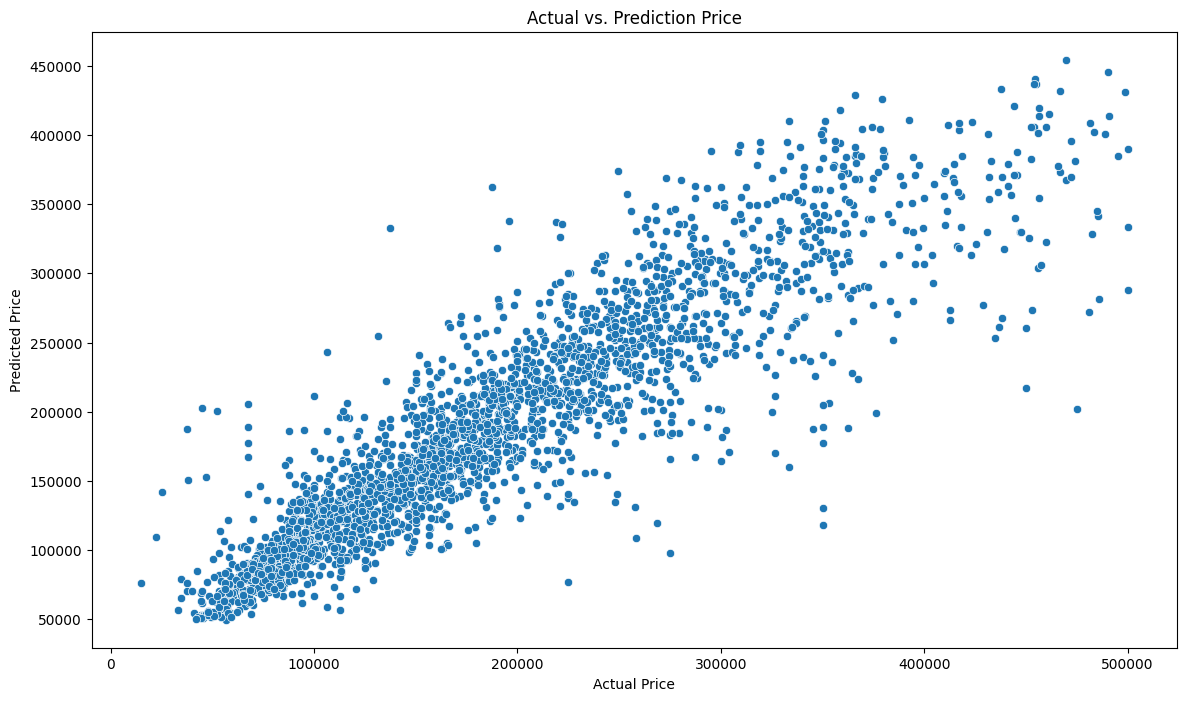

In [67]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

- **Observasi:**
1. **Korelasi Positif yang Kuat**  
   - Terlihat jelas bahwa saat harga aktual meningkat, harga prediksi juga meningkat. Ini menunjukkan bahwa model dapat menangkap pola data dengan cukup baik.
   
2. **Titik-Titik Dekat dengan Garis Diagonal**  
   - Sebagian besar titik data berada dekat dengan garis diagonal (y = x), yang berarti model memberikan prediksi yang cukup akurat dalam banyak kasus.
   - Namun, terdapat beberapa titik yang menyimpang, menandakan adanya prediksi yang kurang akurat pada beberapa sampel.

3. **Penyebaran Lebih Luas pada Harga Tinggi**  
   - Pada rentang harga yang lebih tinggi, titik-titik tampak lebih menyebar, yang menunjukkan bahwa prediksi model cenderung lebih bervariasi dan memiliki error yang lebih besar.

---

- **Wawasan:**
1. **Akurasi Model**  
   - Model menunjukkan akurasi yang cukup baik secara umum, karena sebagian besar titik berada dekat dengan garis diagonal.
   - Namun, masih ada error yang terlihat pada beberapa sampel, terutama untuk harga yang lebih tinggi.

2. **Distribusi Kesalahan**  
   - Terdapat beberapa titik yang jauh dari garis diagonal, yang menunjukkan bahwa model memiliki kesalahan prediksi yang lebih besar untuk beberapa kasus tertentu.
   - Kemungkinan adanya outlier dalam data yang tidak dapat ditangkap dengan baik oleh model.

3. **Performa pada Harga Lebih Tinggi**  
   - Model tampaknya mengalami sedikit kesulitan dalam memprediksi harga yang lebih tinggi.  
   - Ini bisa terjadi karena data dengan harga lebih tinggi memiliki variabilitas yang lebih besar atau mungkin jumlah sampel di rentang ini lebih sedikit dibandingkan dengan harga lebih rendah.

---

- **Kesimpulan:**
- Model ini terlihat cukup baik secara keseluruhan, dengan prediksi yang cukup sejajar dengan nilai aktual.
- Namun, akurasi model bisa ditingkatkan, terutama untuk harga yang lebih tinggi di mana prediksi tampak lebih menyimpang.
- Solusi perbaikan dapat mencakup:
  - Penambahan fitur baru yang lebih relevan.
  - Penggunaan model yang lebih kompleks atau tuning parameter lebih lanjut.
  - Penanganan outlier agar model tidak terlalu terpengaruh oleh data yang ekstrem.

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

<Axes: title={'center': 'Feature Importances'}>

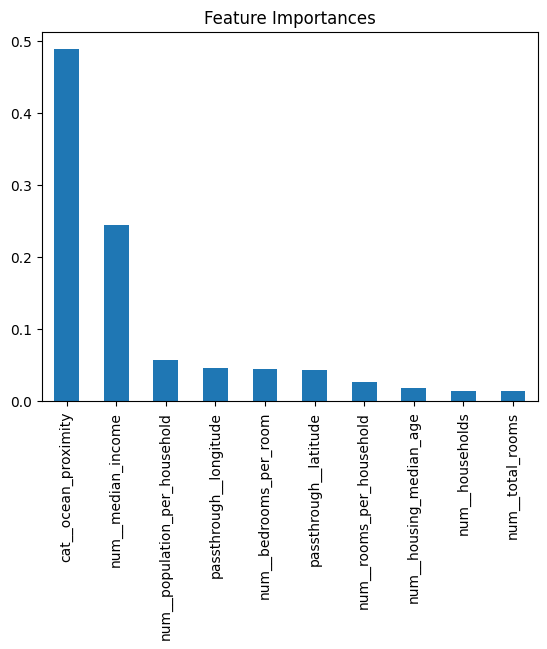

In [68]:
# Mengambil nama-nama fitur setelah transformasi
feature_names = preprocessor.get_feature_names_out()

# Mendapatkan feature importance dari model dan memplotnya
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importances')


1. **Fitur "ocean_proximity"** memiliki nilai penting yang sangat besar dibandingkan dengan fitur lainnya, sekitar **0.5**. Ini menunjukkan bahwa lokasi relatif terhadap laut (ocean_proximity) adalah faktor yang paling memengaruhi prediksi harga rumah dalam model ini.

2. **Fitur "median_income"** juga sangat penting, dengan nilai sekitar **0.2**. Ini konsisten dengan intuisi bahwa pendapatan median rumah tangga memiliki pengaruh besar terhadap harga rumah di suatu area.

3. **Fitur "bedrooms_per_room"**, **"population_per_household"**, dan **"rooms_per_household"** juga memiliki kontribusi yang signifikan terhadap model, meskipun tidak sebesar dua fitur pertama.

4. **Fitur-fitur lain** seperti **latitude**, **longitude**, dan **housing_median_age** memiliki kontribusi yang lebih kecil, tetapi tetap mempengaruhi prediksi harga rumah.

5. **"total_rooms"** dan **"households"** adalah dua fitur dengan kontribusi paling rendah dalam model ini. Mereka mungkin tidak sepenting fitur lainnya dalam memprediksi harga rumah, tetapi tetap berperan dalam model.


## **Kesimpulan dan Rekomendasi**

### **Kesimpulan**
Berdasarkan hasil analisis dan pemodelan, model **XGBoost Regressor** terbukti sebagai model terbaik dalam memprediksi harga rumah di California. Hal ini didukung oleh nilai **RMSE (41,830.30)**, **MAE (28,225.38)**, dan **MAPE (0.168071)** yang lebih rendah dibandingkan model lain seperti Random Forest, KNN, dan Linear Regression.

Setelah dilakukan **Hyperparameter Tuning**, model mengalami peningkatan performa dengan penurunan nilai error yang lebih baik. Namun, terdapat beberapa tantangan yang masih perlu diperhatikan:
1. **Bias pada harga tinggi:** Model masih menunjukkan kesalahan prediksi yang lebih tinggi untuk rumah dengan harga ekstrem.
2. **Fitur paling berpengaruh:** Faktor **ocean proximity** dan **median income** memiliki kontribusi terbesar dalam menentukan harga rumah, menunjukkan bahwa lokasi dan pendapatan masyarakat sangat mempengaruhi harga properti.
3. **Outlier dan Noise dalam Data:** Beberapa prediksi masih menyimpang cukup jauh dari harga sebenarnya, menunjukkan kemungkinan adanya faktor eksternal yang belum terakomodasi oleh model.

Dengan hasil ini, model XGBoost dapat digunakan sebagai dasar dalam sistem prediksi harga rumah, tetapi masih diperlukan beberapa penyempurnaan untuk meningkatkan akurasi dalam berbagai skenario harga.

### **Rekomendasi**
Agar model dapat lebih optimal dan sesuai dengan kebutuhan industri properti, beberapa langkah berikut dapat dilakukan:

1. **Peningkatan Kualitas Fitur**
   - Menambahkan fitur eksternal seperti **harga tanah per lokasi**, data ekonomi makro, kebijakan perumahan, dan tren pasar properti.
   - Menggunakan data **geospatial** yang lebih rinci untuk mengukur dampak lokasi terhadap harga rumah.

2. **Optimasi Model**
   - Melakukan **hyperparameter tuning lebih lanjut** dengan pendekatan seperti **Bayesian Optimization** untuk mendapatkan kombinasi parameter terbaik.
   - Mencoba teknik **ensemble learning lebih kompleks**, misalnya **stacking model** untuk meningkatkan prediksi.

3. **Validasi Model yang Lebih Mendalam**
   - Menggunakan **k-fold cross-validation** dengan lebih banyak split untuk memastikan model stabil dalam berbagai skenario data.
   - Menguji model terhadap dataset dari periode waktu yang berbeda untuk mengetahui apakah model tetap relevan dalam kondisi pasar yang berubah.

4. **Eksperimen dengan Model Alternatif**
   - Menggunakan model **Deep Learning**, seperti **Neural Networks**, untuk menangkap hubungan non-linear yang lebih kompleks dalam data harga rumah.
   - Memanfaatkan **transformer-based models** jika jumlah data semakin besar.

5. **A/B Testing untuk Evaluasi Model**
   - Melakukan **A/B Testing** dengan membandingkan performa model saat digunakan dalam lingkungan produksi terhadap model sebelumnya.
   - Menggunakan A/B Testing untuk mengukur dampak model terhadap keputusan bisnis, seperti prediksi harga yang lebih akurat untuk meningkatkan kepuasan pengguna atau konversi penjualan properti.
   - Menyesuaikan parameter model berdasarkan hasil eksperimen untuk mencapai performa optimal.

6. **Aplikasi dalam Industri**
   - Model ini dapat digunakan oleh **agen properti, developer real estate, atau investor** untuk memperkirakan harga rumah secara cepat dan akurat.
   - Bisa diterapkan dalam **platform pencarian properti online** untuk memberikan estimasi harga rumah kepada calon pembeli.
   - Dapat digunakan sebagai dasar untuk **pengambilan keputusan investasi**, terutama dalam menilai daerah yang potensial untuk pertumbuhan harga rumah di masa depan.

Dengan penerapan langkah-langkah ini, model prediksi harga rumah dapat lebih akurat, andal, dan relevan untuk industri properti, serta memberikan wawasan yang lebih mendalam bagi pengguna yang membutuhkannya.



****

#### **Save Model**

In [69]:
import pickle

# Membuat pipeline model
estimator = Pipeline([
    ('preprocess', preprocessor),  # Preprocessing data sebelum masuk ke model
    ('model', XGBRegressor())      # Model XGBoost Regressor
])

# Melatih model dengan data latih (X_train, y_train)
estimator.fit(X_train, y_train)

# Menyimpan model ke dalam file "Model_Airbnb_XGB.sav"
pickle.dump(estimator, open('Model_CaliforniaHousingPrice_XGB.sav', 'wb'))


In [70]:
# Load model
filename = 'Model_CaliforniaHousingPrice_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [71]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(44144.321722053544)